In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
import torch
import numpy as np
import cv2
import os
import warnings
warnings.filterwarnings('ignore')
# from .autonotebook import tqdm as notebook_tqdm

/home/sangeeta/miniconda3/envs/py37/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

url = 'https://ultralytics.com/images/zidane.jpg'
imgs = [url]  # batch of images


results = model(imgs)
boxes = results.xyxy[0]  
results.pandas().xyxy[0]          

Using cache found in /home/sangeeta/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-4-15 torch 1.11.0 CUDA:0 (NVIDIA RTX A6000, 48685MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,742.962158,48.420471,1141.868896,720.000000,0.881118,0,person
1,441.999908,437.496735,496.676910,709.976807,0.675420,27,tie
2,122.936859,193.306244,715.820557,719.669800,0.665036,0,person
3,982.807983,308.423676,1027.359741,419.983734,0.260742,27,tie


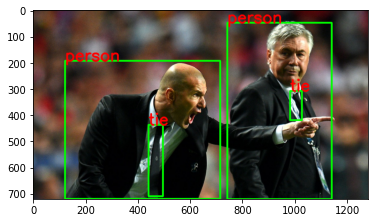

In [3]:
%matplotlib inline

img =np.array(Image.open(requests.get(url, stream=True).raw))

for i in range(len(boxes)): 
    cv2.rectangle(img,(int(boxes[i][0]),int(boxes[i][1])),(int(boxes[i][2]),int(boxes[i][3])),color=(0, 255, 0), thickness=5) 
    cv2.putText(img,results.names[int(boxes[i][-1])],(int(boxes[i][0]),int(boxes[i][1])),  cv2.FONT_HERSHEY_SIMPLEX, 2,thickness=5,color=(255, 0, 0))  
plt.imshow(img) 

In [4]:
img_url = ['http://farm5.staticflickr.com/4079/4736162354_e0ddcc72dc_z.jpg',
           "http://farm4.staticflickr.com/3577/3491669985_d81e1050c6_z.jpg",
           "http://farm8.staticflickr.com/7201/6962274914_55f2a4d39c_z.jpg",
           "http://farm9.staticflickr.com/8331/8395076888_929af4a595_z.jpg",
           "http://farm1.staticflickr.com/23/25514401_b0ee95537c_z.jpg",
           "http://farm5.staticflickr.com/4115/4808627642_46feddf8c3_z.jpg",
           "http://farm3.staticflickr.com/2527/3894984169_a1b0127524_z.jpg"
          ]

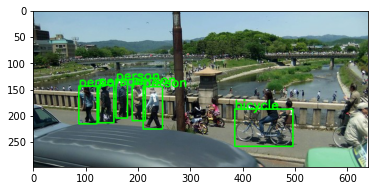

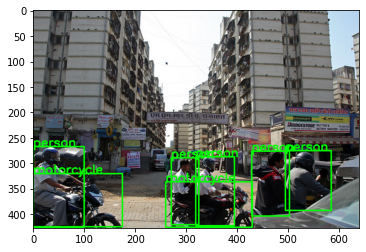

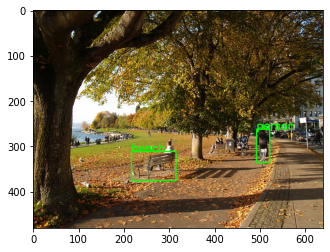

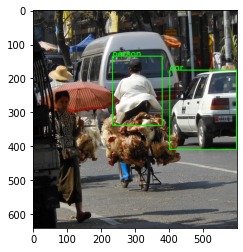

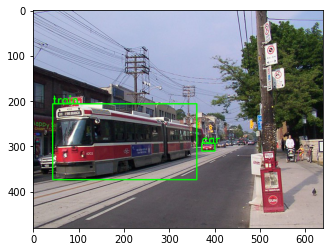

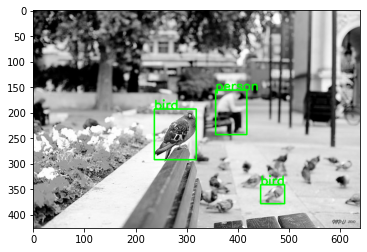

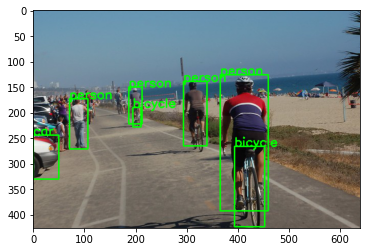

In [10]:
for j,url in enumerate(img_url,1):
    imgs = [url]  # batch of images
    results = model(imgs)
    boxes = results.xyxy[0]  # img1 predictions (tensor)    
    img =np.array(Image.open(requests.get(url, stream=True).raw))
    plt.figure()
    for i in range(len(boxes)): 
        if boxes[i][4]>0.7:
            cv2.rectangle(img,(int(boxes[i][0]),int(boxes[i][1])),(int(boxes[i][2]),int(boxes[i][3])),color=(0, 255, 0), thickness=2) 
            cv2.putText(img,results.names[int(boxes[i][-1])],(int(boxes[i][0]),int(boxes[i][1])),  cv2.FONT_HERSHEY_SIMPLEX, 0.8,thickness=2,color=(0,255, 0))  
    plt.savefig(f"./results/yolo/{j}.png")
    plt.imshow(img)
    
    